<a href="https://colab.research.google.com/github/soph-loaf/aht_project/blob/main/ReadingDataFromWundergound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sophia Ladyzhets, sal2213

Partner: Sally Green

## Reading Data from Wunderground

### Objective:

Scrape data from Weather Underground webpages and make scatterplots of temperature readings taken at different weather stations over defined time intervals.

In [47]:
import requests
import pandas as pd
import numpy as np
import math

from datetime import datetime
from matplotlib import pyplot as plt, dates as mdates


In [45]:
def read_data_from_wu (station, start_date, end_date):
    date_range = pd.date_range(start=start_date, end=end_date)
    weatherdata = pd.DataFrame()   
    try:
        for dates in date_range:
            #print(str(dates.date()))
            url = 'https://www.wunderground.com/dashboard/pws/'+station+'/table/'+str(dates.date())+'/'+str(dates.date())+'/daily'
            rweather = requests.get(url)
            html = rweather.content
            htmldf = pd.read_html(html)
            wdata = htmldf[-1]
            wdata['Date'] = dates.date() 
            weatherdata = weatherdata.append(wdata)   
    except:
        print('something went wrong on ' + str(dates.date()))
    weatherdata.dropna(thresh=5)
    weatherdata.to_csv(station+'_wunderground_'+start_date+'_'+str(dates.date())+'.csv', index=False)

    return weatherdata


def conv_temp(temperature):
    #temperature processing:
    #setting nan values to zero and converting strings to floats
    T = temperature
    for i in range(len(T)):
        if type(T[i]) == str:
            T[i] = T[i][:-3]
        elif math.isnan(T[i]) == True:
            T[i] = 0
        else:
            T[i] = T[i]

    for j in range(len(T)):
        T[j] = float(T[j])

    return T

In [ ]:
# read_data_from_wu('KNYNEWYO343', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1421', '2021-07-01', '2021-07-07')
# read_data_from_wu('KNYNEWYO1335', start_date='2021-07-01', end_date='2021-07-07')   ##no data (all empty :/)
# read_data_from_wu('KNYNEWYO1238', start_date='2021-07-01', end_date='2021-07-07')   ##some data, some empty values --> let's try it!


In [40]:
#load data from csv file into pandas dataframe
data_343 = pd.read_csv('../aht_project/KNYNEWYO343_wunderground_2021-07-01_2021-07-07.csv')
data_1421 = pd.read_csv('../aht_project/KNYNEWYO1421_wunderground_2021-07-01_2021-07-07.csv')
data_1238 = pd.read_csv('../aht_project/KNYNEWYO1238_wunderground_2021-07-01_2021-07-07.csv')

#data_1238

,Time,Temperature,Dew Point,Humidity,Wind,Speed,Gust,Pressure,Precip. Rate.,Precip. Accum.,UV,Solar,Date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-01
1,12:04 AM,--,--,--,North,--,--,29.92 °in,--,--,NaN,w/m²,2021-07-01
2,12:09 AM,--,--,--,North,--,--,29.92 °in,--,--,NaN,w/m²,2021-07-01
3,12:14 AM,--,--,--,North,--,--,29.92 °in,--,--,NaN,w/m²,2021-07-01
4,12:19 AM,--,--,--,North,--,--,29.93 °in,--,--,NaN,w/m²,2021-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,11:39 PM,86.0 °F,75.6 °F,71 °%,WSW,4.5 °mph,6.1 °mph,29.93 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-07-07
1943,11:44 PM,85.8 °F,75.4 °F,71 °%,SW,4.0 °mph,5.6 °mph,29.93 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-07-07
1944,11:49 PM,85.6 °F,75.2 °F,71 °%,WSW,5.5 °mph,7.6 °mph,29.94 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-07-07
1945,11:54 PM,85.6 °F,75.3 °F,71 °%,SW,4.4 °mph,5.5 °mph,29.94 °in,0.00 °in,0.00 °in,0.0,0 w/m²,2021-07-07


In [46]:
#store dates and temperature data in lists
x_343 = list(data_343['Date'])
x_1421 = list(data_1421['Date'])
x_1238 = list(data_1238['Date'])

T_343 = conv_temp(list(data_343['Temperature']))
T_1421 = conv_temp(list(data_1421['Temperature']))
# T_1238 = conv_temp(list(data_1238['Temperature']))   #need to add way to parse '--' values in df

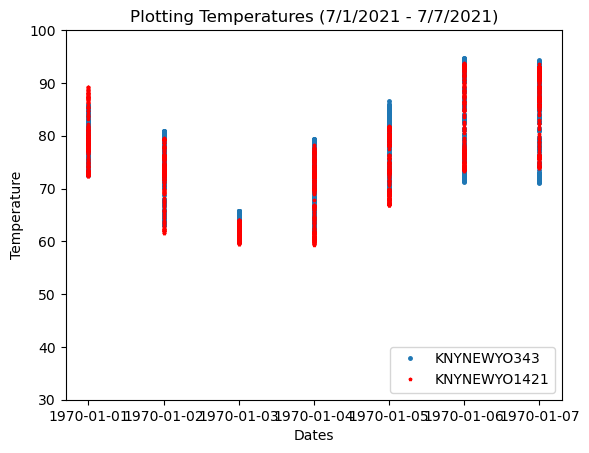

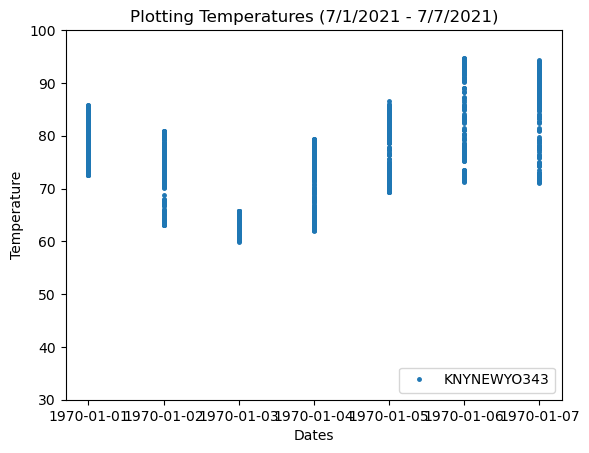

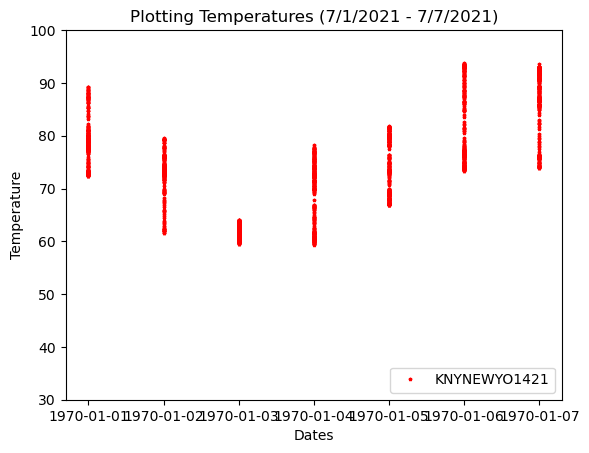

In [35]:
#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
ax.plot(x_1421, T_1421, '*r', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
# ax.plot(x_1421, T_1421, '*', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

#making a scatter plot while omitting nan values
#defined custom y-range in order to avoid plotting zeroes
fig = plt.figure()
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator())
# ax.plot(x_343, T_343, 'o', markersize=2.5, label='KNYNEWYO343')
ax.plot(x_1421, T_1421, '*r', markersize=2.5, label='KNYNEWYO1421')
ax.set_xlabel("Dates")
ax.set_ylabel("Temperature")
ax.set_ylim([30.0, 100.0])
ax.set_title('Plotting Temperatures (7/1/2021 - 7/7/2021)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# dates = list(weatherdata['Date'])
# # dates1 = ["01/02/2021", "01/03/2021", "01/04/2021", "01/05/2021", "01/06/2021", ]
# # [datetime.strptime(d, "%m/%d/%Y").date() for d in dates1]
# time = weatherdata['Time']
# temp = list(weatherdata['Temperature'])